In [1]:
input_shape = (160, 160,3)

In [2]:
from tensorflow.keras import backend as K

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as K

In [4]:
import os

import numpy as np
import pandas as pd
import cv2

from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model, load_model

In [5]:
from tensorflow.keras import models
import tensorflow as tf

In [6]:
model = load_model('deepfake-detection2.h5')

In [7]:
conv_layer = model.get_layer("conv_7b")

In [19]:
img_path ='./test1.jpg' 

In [20]:
img = load_img(img_path, target_size=(160,160)) 
img_tensor = np.expand_dims(img, axis=0)

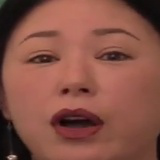

In [21]:
img

In [22]:
img_tensor = img_tensor/255.0

In [23]:
img_tensor

array([[[[0.29803922, 0.38431373, 0.30196078],
         [0.30196078, 0.38823529, 0.30588235],
         [0.29803922, 0.36470588, 0.29019608],
         ...,
         [0.08235294, 0.05882353, 0.05882353],
         [0.08235294, 0.0627451 , 0.05098039],
         [0.09019608, 0.05882353, 0.05098039]],

        [[0.29019608, 0.37647059, 0.29411765],
         [0.28627451, 0.36078431, 0.28235294],
         [0.2745098 , 0.34117647, 0.27058824],
         ...,
         [0.08235294, 0.05882353, 0.05882353],
         [0.08235294, 0.0627451 , 0.05098039],
         [0.07843137, 0.05882353, 0.04705882]],

        [[0.27843137, 0.35294118, 0.2745098 ],
         [0.27058824, 0.34509804, 0.27058824],
         [0.25882353, 0.31372549, 0.24705882],
         ...,
         [0.08235294, 0.05882353, 0.05882353],
         [0.08235294, 0.05882353, 0.05882353],
         [0.08235294, 0.05882353, 0.05882353]],

        ...,

        [[0.04705882, 0.04705882, 0.03921569],
         [0.03921569, 0.03921569, 0.03137255]

In [24]:
img_tensor.shape

(1, 160, 160, 3)

In [25]:
#crop_img = np.random.random((160, 160, 3))
#img_tensor = preprocessing.image.img_to_array(crop_img)
#img_tensor = np.expand_dims(crop_img, axis=0)

In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 79, 79, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 79, 79, 32)   96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 79, 79, 32)   0           batch_normalization_203[0][0]    
____________________________________________________________________________________________

block17_2 (Lambda)              (None, 8, 8, 1088)   0           block17_1_ac[0][0]               
                                                                 block17_2_conv[0][0]             
__________________________________________________________________________________________________
block17_2_ac (Activation)       (None, 8, 8, 1088)   0           block17_2[0][0]                  
__________________________________________________________________________________________________
conv2d_288 (Conv2D)             (None, 8, 8, 128)    139264      block17_2_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_288 (BatchN (None, 8, 8, 128)    384         conv2d_288[0][0]                 
__________________________________________________________________________________________________
activation_288 (Activation)     (None, 8, 8, 128)    0           batch_normalization_288[0][0]    
__________

__________________________________________________________________________________________________
conv2d_405 (Conv2D)             (None, 3, 3, 256)    172032      activation_404[0][0]             
__________________________________________________________________________________________________
batch_normalization_402 (BatchN (None, 3, 3, 192)    576         conv2d_402[0][0]                 
__________________________________________________________________________________________________
batch_normalization_405 (BatchN (None, 3, 3, 256)    768         conv2d_405[0][0]                 
__________________________________________________________________________________________________
activation_402 (Activation)     (None, 3, 3, 192)    0           batch_normalization_402[0][0]    
__________________________________________________________________________________________________
activation_405 (Activation)     (None, 3, 3, 256)    0           batch_normalization_405[0][0]    
__________

In [27]:
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])
# # Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    #pred += model.predict(crop_img)[0][0]
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

(1, 3, 3)


In [28]:
heatmap

array([[[0.57276195, 0.7504903 , 0.6464442 ],
        [0.7984742 , 0.880752  , 0.79463   ],
        [0.67406774, 1.        , 0.8325302 ]]], dtype=float32)

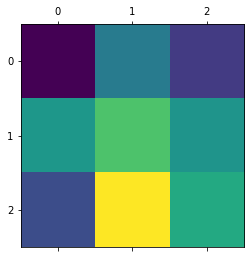

In [30]:
plt.matshow(heatmap[0])
plt.show()

In [31]:
import cv2
img = cv2.imread(img_path)

In [39]:
img

array([[[204, 188,  77],
        [206, 188,  78],
        [204, 183,  76],
        ...,
        [129,  15,  15],
        [129,  15,  14],
        [129,  15,  14]],

       [[203, 185,  75],
        [200, 182,  72],
        [199, 176,  70],
        ...,
        [129,  15,  15],
        [129,  15,  14],
        [128,  14,  13]],

       [[200, 179,  72],
        [198, 177,  70],
        [193, 170,  64],
        ...,
        [129,  15,  15],
        [129,  15,  15],
        [129,  15,  15]],

       ...,

       [[141, 102,   9],
        [139, 100,   7],
        [141,  98,   6],
        ...,
        [159,  27,  23],
        [141,  13,  10],
        [130,   5,   3]],

       [[131, 103,   6],
        [134, 104,   8],
        [141, 102,   9],
        ...,
        [167,  33,  30],
        [145,  17,  14],
        [131,   6,   4]],

       [[128, 106,   7],
        [132, 106,   9],
        [137, 101,   7],
        ...,
        [172,  38,  35],
        [148,  20,  17],
        [131,   6,   4]]

In [32]:
heatmap2 = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap2 = np.uint8(255 * heatmap2)
heatmap2 = cv2.applyColorMap(heatmap2, cv2.COLORMAP_JET)
hif = .5
superimposed_img = heatmap2 * hif + img

In [40]:
heatmap2.shape

(160, 160, 3)

In [33]:
superimposed_img.shape

(160, 160, 3)

In [34]:
import matplotlib.image as mpimg

In [35]:
output = 'output.jpeg'
cv2.imwrite(output, superimposed_img)

img=cv2.imread(output)

(-0.5, 159.5, 159.5, -0.5)

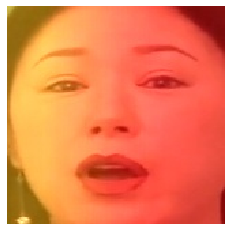

In [36]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
#plt.title(predictions.loc[0,'category'])